In [1]:
import tensorflow as tf
import time
import numpy as np
from matplotlib import pyplot as plt

from data_generator import DataGenerator
from evaluator import Evaluator

2021-07-24 11:32:18.639358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-24 11:32:18.639499: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
input_shape = (224, 224, 3)
batch_size = 1

In [3]:
model = tf.keras.models.load_model('mbnv3_2021-07-04_ori.h5')

2021-07-24 11:32:22.556851: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-24 11:32:22.557097: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-24 11:32:22.557143: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-1QNQD56): /proc/driver/nvidia/version does not exist
2021-07-24 11:32:22.557571: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
train_generator = DataGenerator(input_shape=input_shape, batch_size=batch_size, data_type="Train")
validation_generator = DataGenerator(input_shape=input_shape, batch_size=batch_size, data_type="Val")

In [5]:
evaluator = Evaluator(validation_generator, model)

In [6]:
evaluator.run_evaluation()


  0%|                                                                                         | 0/19312 [00:00<?, ?it/s]

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


2021-07-24 11:32:27.972659: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
100%|███████████████████████████████████████████████████████████████████████████| 19312/19312 [1:03:28<00:00,  5.07it/s]


In [7]:
np_diff_parts_measurements = np.squeeze(np.array(evaluator.list_diff_parts_measurements))
print(np_diff_parts_measurements[:,0].shape)

np_diff_percentage_parts_measurements = np.squeeze(np.array(evaluator.list_diff_percentage_parts_measurements))
print(np_diff_percentage_parts_measurements[:,0].shape)

(19312,)
(19312,)


idx 0


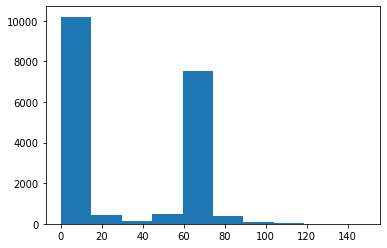

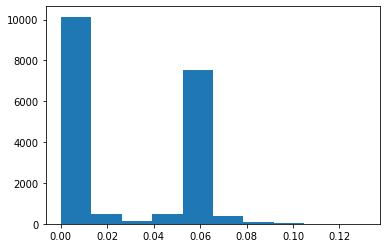

idx 1


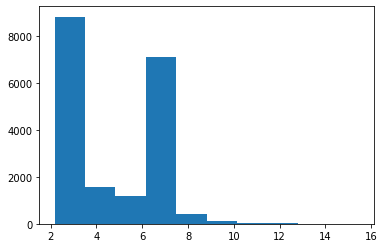

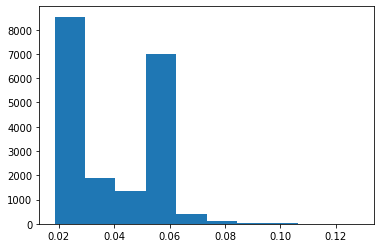

idx 2


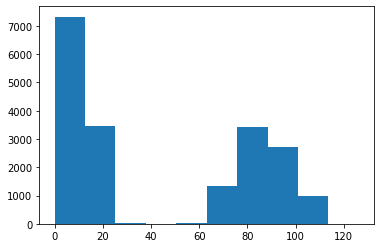

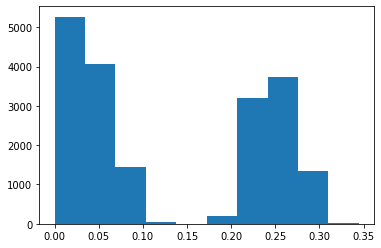

idx 3


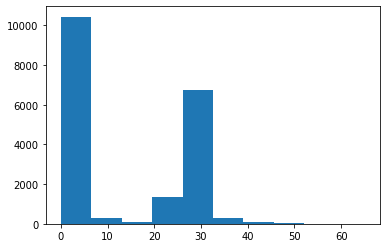

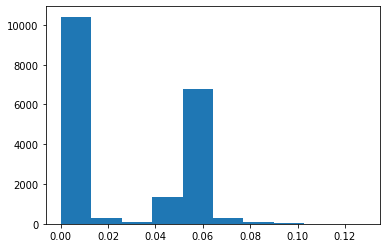

idx 4


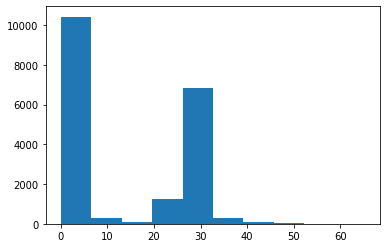

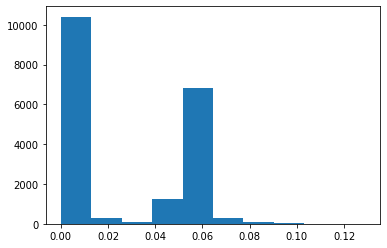

idx 5


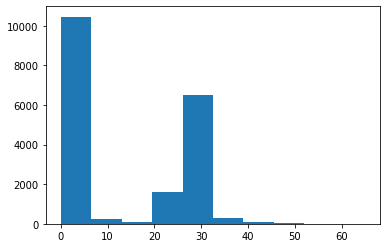

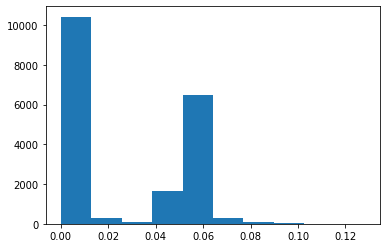

idx 6


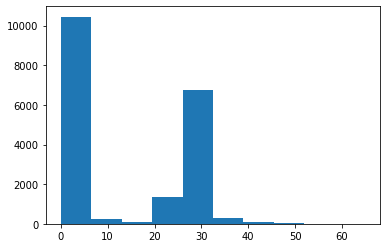

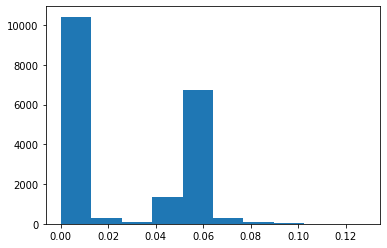

idx 7


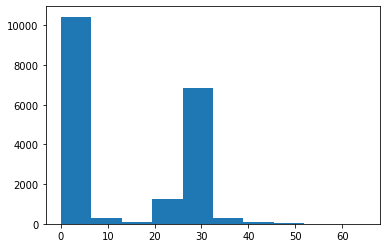

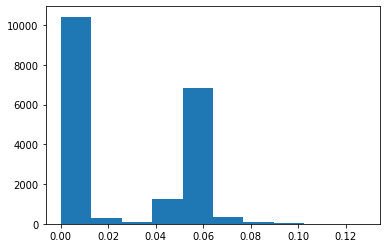

In [9]:
for idx in range(np_diff_parts_measurements.shape[1]) :
    print("idx",idx)
    plt.hist(x=np_diff_parts_measurements[:,idx])
    plt.show()
    plt.hist(x=np_diff_percentage_parts_measurements[:,idx])
    plt.show()

In [9]:
model = tf.keras.applications.MobileNetV3Small(input_shape=input_shape, include_top=False, classifier_activation=None)

In [9]:
output = tf.keras.layers.Conv2D(8, kernel_size=(1,1), strides=(1,1), use_bias=True)(model.output)
model = tf.keras.models.Model(model.input, output)

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv (Conv2D)                   (None, 112, 112, 16) 432         rescaling[0][0]                  
__________________________________________________________________________________________________
Conv/BatchNorm (BatchNormalizat (None, 112, 112, 16) 64          Conv[0][0]                       
______________________________________________________________________________________________

__________________________________________________________________________________________________
multiply_5 (Multiply)           (None, 14, 14, 240)  0           expanded_conv_5/expand/BatchNorm[
                                                                 tf.math.multiply_8[0][0]         
__________________________________________________________________________________________________
expanded_conv_5/depthwise (Dept (None, 14, 14, 240)  6000        multiply_5[0][0]                 
__________________________________________________________________________________________________
expanded_conv_5/depthwise/Batch (None, 14, 14, 240)  960         expanded_conv_5/depthwise[0][0]  
__________________________________________________________________________________________________
tf.__operators__.add_9 (TFOpLam (None, 14, 14, 240)  0           expanded_conv_5/depthwise/BatchNo
__________________________________________________________________________________________________
re_lu_14 (

__________________________________________________________________________________________________
re_lu_22 (ReLU)                 (None, 14, 14, 288)  0           tf.__operators__.add_17[0][0]    
__________________________________________________________________________________________________
tf.math.multiply_17 (TFOpLambda (None, 14, 14, 288)  0           re_lu_22[0][0]                   
__________________________________________________________________________________________________
multiply_11 (Multiply)          (None, 14, 14, 288)  0           expanded_conv_8/expand/BatchNorm[
                                                                 tf.math.multiply_17[0][0]        
__________________________________________________________________________________________________
expanded_conv_8/depthwise/pad ( (None, 17, 17, 288)  0           multiply_11[0][0]                
__________________________________________________________________________________________________
expanded_c

tf.math.multiply_25 (TFOpLambda (None, 1, 1, 576)    0           re_lu_30[0][0]                   
__________________________________________________________________________________________________
expanded_conv_10/squeeze_excite (None, 7, 7, 576)    0           multiply_16[0][0]                
                                                                 tf.math.multiply_25[0][0]        
__________________________________________________________________________________________________
expanded_conv_10/project (Conv2 (None, 7, 7, 96)     55296       expanded_conv_10/squeeze_excite/M
__________________________________________________________________________________________________
expanded_conv_10/project/BatchN (None, 7, 7, 96)     384         expanded_conv_10/project[0][0]   
__________________________________________________________________________________________________
expanded_conv_10/Add (Add)      (None, 7, 7, 96)     0           expanded_conv_9/Add[0][0]        
          

In [9]:
model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(1e-5), metrics=['mape'])

In [10]:
local_date = time.strftime('%Y-%m-%d', time.localtime(time.time()))
fname = '{}_{}'.format("mbnv3", local_date)
h5_out_path = fname + ".h5"
callbacks = [
        tf.keras.callbacks.ModelCheckpoint(h5_out_path, verbose=1),
    ]

In [12]:
model.fit(train_generator, epochs=5, validation_data=validation_generator, callbacks=callbacks)

2021-07-04 13:16:24.313218: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
35832/35832 [==============================] - 8504s 237ms/step - loss: 16.5361 - mape: 3.7654 - val_loss: 18.6846 - val_mape: 4.1242

Epoch 00001: saving model to mbnv3_2021-07-04.h5


/home/hangil/.pyenv/versions/3.7.5/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/5
35832/35832 [==============================] - 10918s 305ms/step - loss: 16.5000 - mape: 3.7567 - val_loss: 18.3869 - val_mape: 4.1441

Epoch 00002: saving model to mbnv3_2021-07-04.h5
Epoch 3/5
 3623/35832 [==>...........................] - ETA: 2:35:47 - loss: 16.5209 - mape: 3.7644

KeyboardInterrupt: 